In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
file = 'covid_data.csv'
df = pd.read_csv(file, encoding="ISO-8859-1")

In [3]:
df
del df['Province/State']
del df['Last Update']
del df['SNo']

In [4]:
# mexico_data = df.loc[df['Country/Region'] == 'Mexico',:]
# mexico_data
date = df['ObservationDate'].str.split(pat="/", expand = True)
# df['Day'] = date[1]
df['Month'] = date[0]
df['Year'] = date[2]

In [5]:
m = (df['Country/Region'] == 'Mexico') | (df['Country/Region'] == 'US') | (df['Country/Region'] == 'Canada')
clean_df = df.loc[m,:]

In [6]:
clean_df2 = clean_df.drop(['ObservationDate'],axis=1)
clean_df3 = clean_df2.groupby(['Country/Region','Month'])

In [7]:
mx_covid_df = clean_df.loc[(clean_df['Country/Region']=='Mexico'),:].reset_index(drop=True)
mx_covid_df = mx_covid_df.drop(['ObservationDate'],axis=1)
mx_covid_df2 = mx_covid_df.groupby(['Year', 'Month','Country/Region'])['Confirmed','Deaths','Recovered'].sum().reset_index()

mx_covid_alt = mx_covid_df2.melt(["Year","Month","Country/Region"],var_name="Status", value_name="Count")
mx_covid_alt["Date"] = mx_covid_alt['Year'] + mx_covid_alt['Month']
mx_covid_alt2 = mx_covid_alt.drop(['Year', 'Month'],axis=1)


D:\anaconda3\envs\pythonData\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  This is separate from the ipykernel package so we can avoid doing imports until


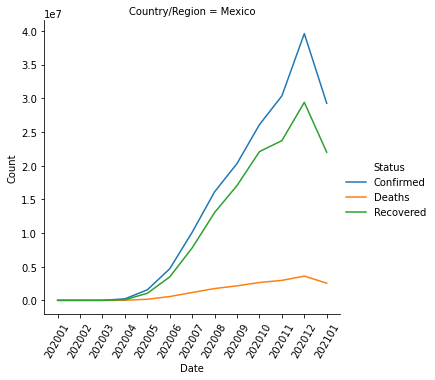

In [8]:
g_mx = sns.relplot(data=mx_covid_alt, x='Date', y='Count', col="Country/Region", hue='Status', kind='line')
g_mx.set_xticklabels(rotation=60)

In [9]:
ca_covid_df = clean_df.loc[(clean_df['Country/Region']=='Canada'),:].reset_index(drop=True)
ca_covid_df = ca_covid_df.drop(['ObservationDate'],axis=1)
ca_covid_df2 = ca_covid_df.groupby(['Year', 'Month','Country/Region'])['Confirmed','Deaths','Recovered'].sum().reset_index()


ca_covid_alt = ca_covid_df2.melt(["Year","Month",'Country/Region'],var_name="Status", value_name="Count")
ca_covid_alt["Date"] = ca_covid_alt['Year'] + ca_covid_alt['Month']
ca_covid_alt2 = ca_covid_alt.drop(['Year', 'Month'],axis=1)


D:\anaconda3\envs\pythonData\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  This is separate from the ipykernel package so we can avoid doing imports until


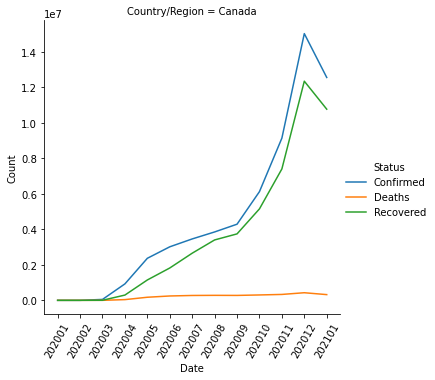

In [10]:
g_ca = sns.relplot(data=ca_covid_alt, x='Date', y='Count', col="Country/Region", hue='Status', kind='line')
g_ca.set_xticklabels(rotation=60)

In [11]:
us_covid_df = clean_df.loc[(clean_df['Country/Region']=='US'),:].reset_index(drop=True)
us_covid_df = us_covid_df.drop(['ObservationDate'],axis=1)
us_covid_df2 = us_covid_df.groupby(['Year', 'Month','Country/Region'])['Confirmed','Deaths','Recovered'].sum().reset_index()


us_covid_alt = us_covid_df2.melt(["Year","Month","Country/Region"],var_name="Status", value_name="Count")
us_covid_alt["Date"] = us_covid_alt['Year'] + us_covid_alt['Month']
us_covid_alt2 = us_covid_alt.drop(['Year', 'Month'],axis=1)


D:\anaconda3\envs\pythonData\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  This is separate from the ipykernel package so we can avoid doing imports until


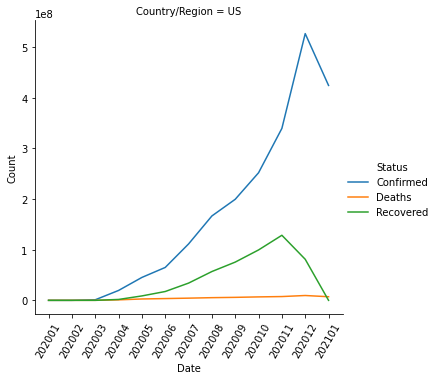

In [12]:
g_us = sns.relplot(data=us_covid_alt, x='Date', y='Count', col="Country/Region", hue='Status', kind='line')
g_us.set_xticklabels(rotation=60)

In [13]:
all_covid_df = clean_df.drop(['ObservationDate'],axis=1)
all_covid_df2 = all_covid_df.groupby(['Year', 'Month','Country/Region'])['Confirmed','Deaths','Recovered'].sum().reset_index()

all_covid_alt = all_covid_df2.melt(["Year","Month","Country/Region"],var_name="Status", value_name="Count")
all_covid_alt["Date"] = all_covid_alt['Year'] + all_covid_alt['Month']
all_covid_alt2 = all_covid_alt.drop(['Year', 'Month'],axis=1)

D:\anaconda3\envs\pythonData\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


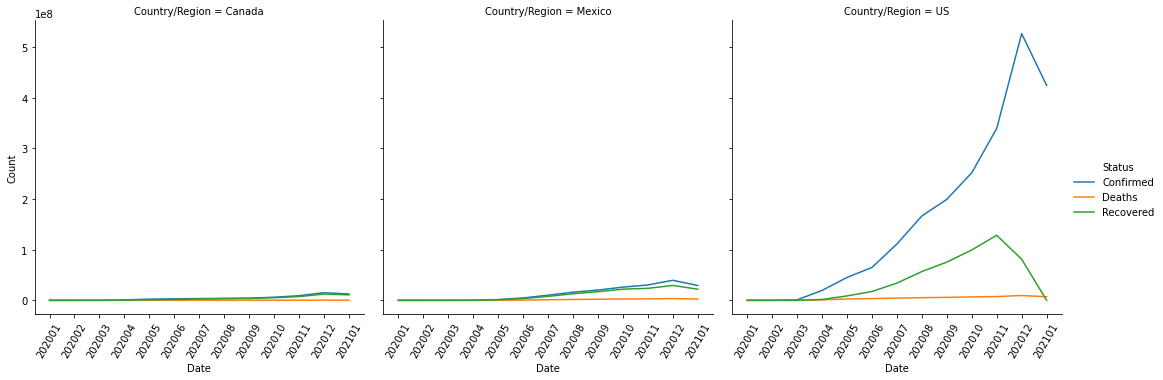

In [14]:
g_all = sns.relplot(data=all_covid_alt, x='Date', y='Count', col="Country/Region", hue='Status', kind='line')
g_all.set_xticklabels(rotation=60)